<a href="https://colab.research.google.com/github/charithcherry/MLnow_2.0/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Modified Date**: June 10, 2021


**Author**:
 P Charith 

 

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/ML_now2.0'

/content/drive/MyDrive/ML_now2.0


In [4]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [5]:
import os

In [6]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [7]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [8]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [19]:
mathData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [20]:
mathData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [9]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [10]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [11]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv
student-merge.R  student.txt


## Data visualization

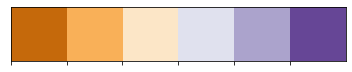

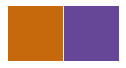

In [12]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [15]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

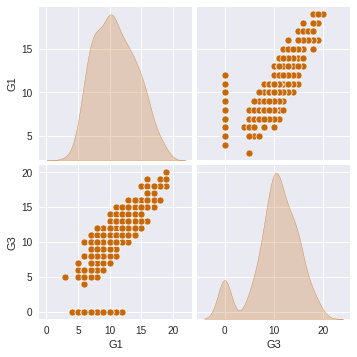

In [16]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

Text(0.5, 1.0, 'correletion between G1 and G3')

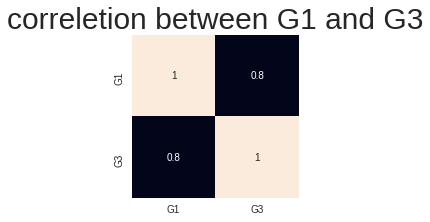

In [24]:
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(uniMathData.corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('correletion between G1 and G3', fontsize=30)

## Data Splits

In [25]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [26]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [27]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [28]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [29]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [83]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [84]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [85]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 14ms/step - loss: 14.9336 - mae: 14.9336 - mse: 255.9886 - val_loss: 15.7221 - val_mae: 15.7221 - val_mse: 281.6765
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 14.8169 - mae: 14.8169 - mse: 252.2282 - val_loss: 15.5977 - val_mae: 15.5977 - val_mse: 277.4130
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 14.6988 - mae: 14.6988 - mse: 248.3872 - val_loss: 15.4737 - val_mae: 15.4737 - val_mse: 273.1981
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 14.5812 - mae: 14.5812 - mse: 244.6140 - val_loss: 15.3497 - val_mae: 15.3497 - val_mse: 269.0141
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 14.4642 - mae: 14.4642 - mse: 240.8904 - val_loss: 15.2251 - val_mae: 15.2251 - val_mse: 264.8439
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 14.3464 - mae: 14.3464 - mse: 237.1621 - val_loss: 15.1005 - val_mae: 1

In [86]:
print(history)

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


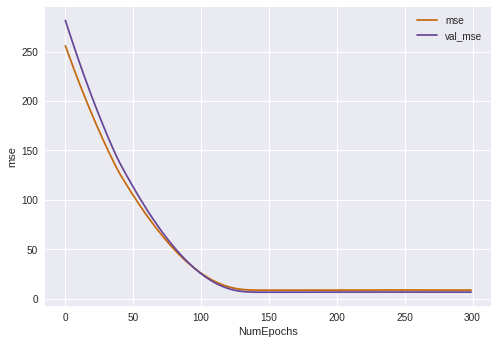

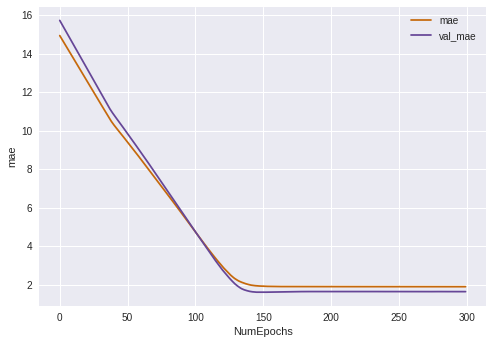

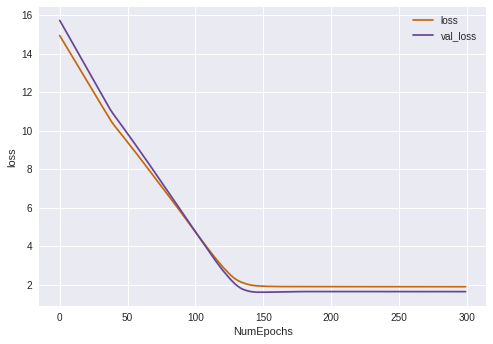

In [88]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [89]:
model.predict([1])

array([[2.052329]], dtype=float32)

In [90]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.052329]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.052329]
 [2.956345]
 [3.860361]
 [4.764377]
 [5.668393]]

List of Predictions (flattened out):
[2.052329 2.956345 3.860361 4.764377 5.668393]



In [91]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [92]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [93]:
print(len(testPreds))
print(testPreds)

79
[13.804537  6.572409 11.092489 16.516586 16.516586 11.996506 13.804537
 18.324617 18.324617  8.380442 13.804537 12.900522  8.380442  7.476425
  9.284458 12.900522 11.092489 15.61257   7.476425 10.188473 14.708553
 12.900522 13.804537 15.61257   7.476425  7.476425  8.380442 10.188473
 11.996506 10.188473 11.996506 12.900522 10.188473  6.572409  9.284458
 11.996506  7.476425  8.380442 13.804537  9.284458  9.284458  7.476425
 11.996506  6.572409 12.900522  7.476425  7.476425 11.092489 12.900522
 16.516586 11.996506 14.708553  9.284458 11.996506 14.708553 11.996506
 14.708553 11.996506 14.708553 11.092489 11.996506  8.380442 15.61257
  7.476425 15.61257  11.092489 15.61257  12.900522  8.380442  8.380442
 11.996506 17.420603 12.900522 15.61257  10.188473  7.476425 10.188473
  7.476425 11.092489]


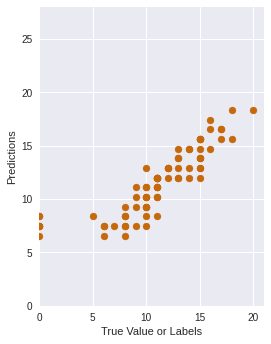

In [94]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

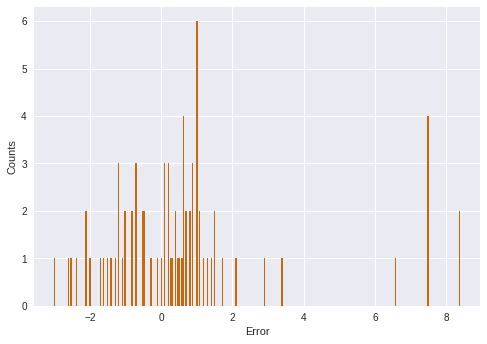

In [95]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)



Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions

In [74]:
print("{}".format(trainFeatures))

     G1
329  14
318  11
317   9
65   16
59   15
..   ..
279  10
227  12
148   7
143  14
180   9

[316 rows x 1 columns]


In [75]:
print("{}".format(trainLabels))

329    14
318    10
317     9
65     15
59     16
       ..
279    10
227    12
148     0
143    13
180     8
Name: G3, Length: 316, dtype: int64


In [127]:
model1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])


In [128]:
model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(), 
    optimizer = tf.keras.optimizers.SGD(0.0001), 
    # optimizer = 'adam',
    metrics = ['mse','mae'] 
)

In [129]:
numEpochs = 300
history1 = model1.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 15ms/step - loss: 25.0423 - mse: 700.2298 - mae: 25.0423 - val_loss: 26.4872 - val_mse: 780.9258 - val_mae: 26.4872
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 24.9253 - mse: 693.8078 - mae: 24.9253 - val_loss: 26.3628 - val_mse: 773.7181 - val_mae: 26.3628
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 24.8084 - mse: 687.4975 - mae: 24.8084 - val_loss: 26.2383 - val_mse: 766.5436 - val_mae: 26.2383
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 24.6915 - mse: 681.0902 - mae: 24.6915 - val_loss: 26.1138 - val_mse: 759.3962 - val_mae: 26.1138
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 24.5745 - mse: 674.7776 - mae: 24.5745 - val_loss: 25.9893 - val_mse: 752.2855 - val_mae: 25.9893
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 24.4575 - mse: 668.4900 - mae: 24.4575 - val_loss: 25.8648 - val_mse: 7